In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix,r2_score
import pickle


In [ ]:
df = pd.read_csv('loan_approval_dataset.csv')

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
# Remove spaces and normalize column names
df.columns = df.columns.str.strip().str.lower()  # all lowercase, no spaces
le = LabelEncoder()
df['loan_status'] = le.fit_transform(df['loan_status'])
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
x_reg = df[['no_of_dependents','education','self_employed','income_annum',
            'loan_amount','loan_term','residential_assets_value','commercial_assets_value','loan_status']]
y_reg = df['cibil_score']

# Train-test split
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(
    x_reg, y_reg, test_size=0.3, random_state=42
)

# Model with tuned hyperparameters
model_reg = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,        # let trees grow until pure
    min_samples_leaf=1,
    max_features='sqrt',   # reduce correlation between trees
    random_state=42
)

# Train
model_reg.fit(x_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = model_reg.predict(x_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = mse**0.5
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Save model
pickle.dump(model_reg, open("model_reg.pkl", "wb"))

Mean Squared Error (MSE): 11486.25564973068
Root Mean Squared Error (RMSE): 107.17395042514146


In [ ]:
x_clas = df[['no_of_dependents','education','self_employed','income_annum',
            'loan_amount','loan_term','cibil_score','residential_assets_value','commercial_assets_value']]
y_clas = df['loan_status']

# Train-test split
x_train_clas, x_test_clas, y_train_clas, y_test_clas = train_test_split(
    x_clas, y_clas, test_size=0.3, random_state=42
)

# Model with tuned hyperparameters
model_clas = RandomForestClassifier()

# Train
model_clas.fit(x_train_clas, y_train_clas)

# Predict and evaluate
y_pred_clas = model_clas.predict(x_test_clas)
accuracy = accuracy_score(y_test_clas,y_pred_clas)
print(accuracy)
# Save model
pickle.dump(model_reg, open("model_clas.pkl", "wb"))

0.9797033567525371


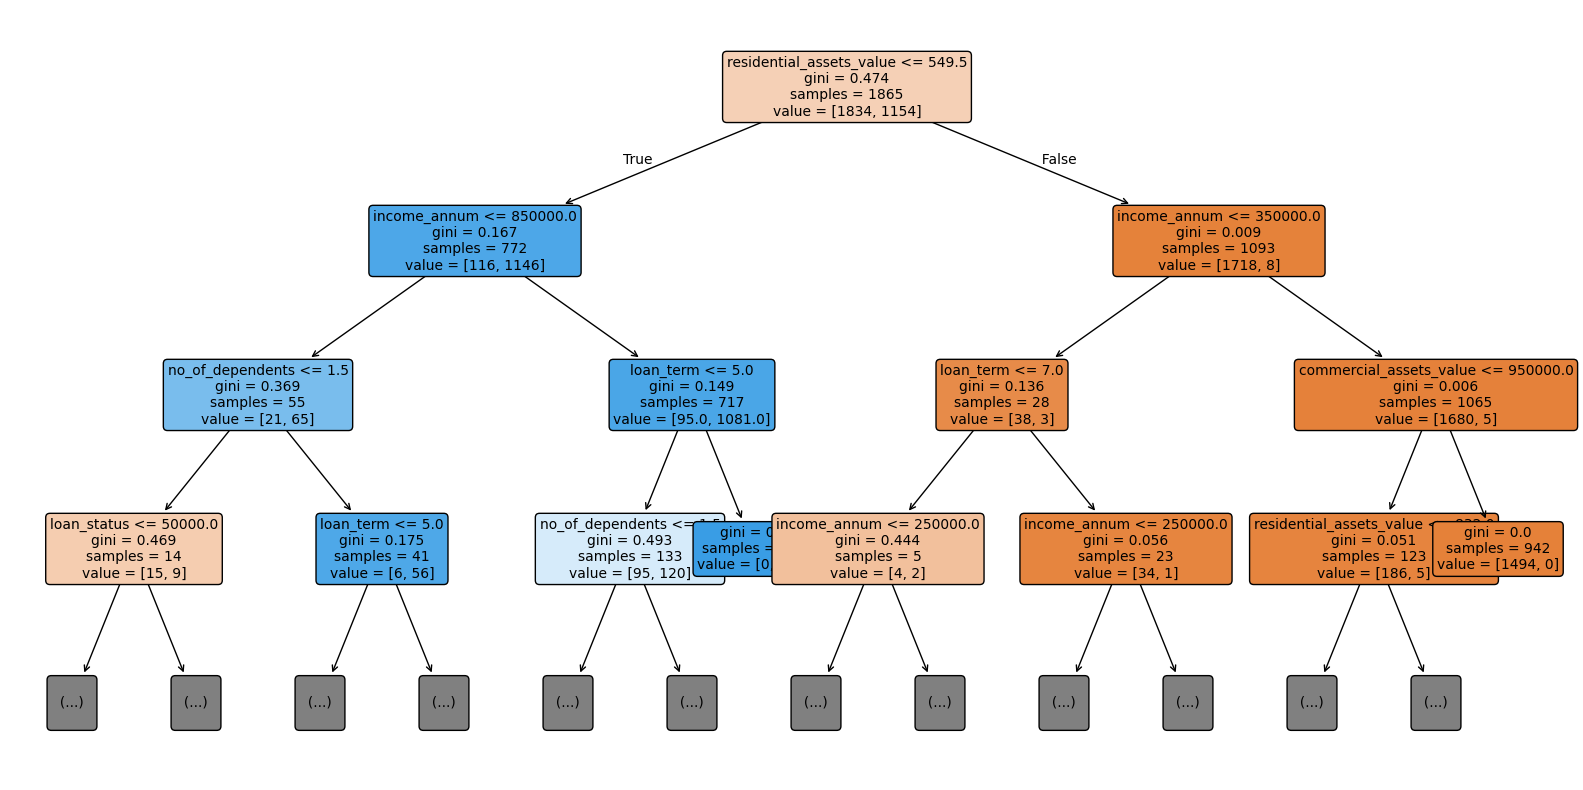

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pick the first tree in the forest
tree = model_clas.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree,
          feature_names = x_reg.columns,
          max_depth = 3,
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_clas, x_clas, y_clas, cv=5)
print("Average CV Accuracy:", cv_scores.mean())


Average CV Accuracy: 0.9826656709615602


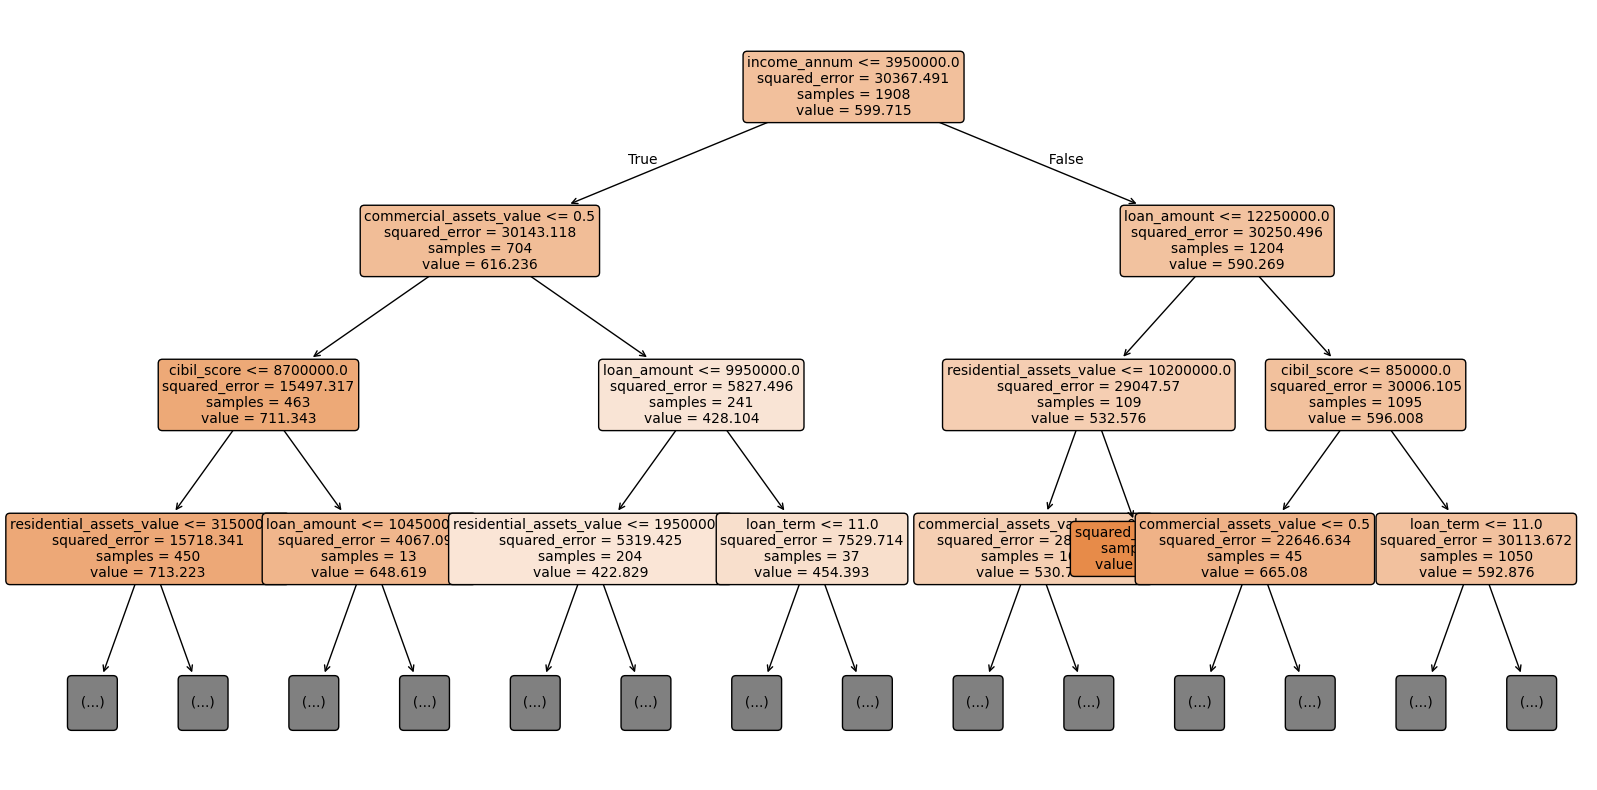

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pick the first tree in the forest
tree = model_reg.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree,
          feature_names = x_clas.columns,
          max_depth = 3,
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()